[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/02_Compare_Loss_Function_FashionMnist.ipynb)

# 02 Comparison of Different Loss Function Using FashionMNIST


## 1. Introduction to the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Labels:


*   0 : T-shirt/top
*   1 : Trouser
*   2 : Pullover
*   3 : Dress
*   4 : Coat
*   5 : Sandal
*   6 : Shirt
*   7 : Sneake
*   8 : Bag
*   9 : Ankle Boot











## 2. Data Preprocessing

In [0]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [0]:
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
Y_train = to_categorical(Y_train,num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [48]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## 3. Building the Neural Network

In [0]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import losses
from keras.layers.normalization import BatchNormalization

In [0]:
batch_size = 256
epochs = 100
input_shape = (img_rows, img_cols, 1)

In [0]:
def model(loss):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                   kernel_initializer='he_normal',input_shape=input_shape))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_classes,activation='softmax'))
  
  model.compile(loss=loss,
               optimizer='adam',metrics=['accuracy'])
  
  return model

### 3.1 Loss = Mean Squared Error





In [0]:
loss_1 =losses.mean_squared_error

In [53]:
start = time.time()
model_1 = model(loss_1)
model_1_history = model_1.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 7s - loss: 0.0567 - acc: 0.5387 - val_loss: 0.0384 - val_acc: 0.7169
Epoch 2/100
 - 5s - loss: 0.0375 - acc: 0.7230 - val_loss: 0.0327 - val_acc: 0.7586
Epoch 3/100
 - 5s - loss: 0.0338 - acc: 0.7510 - val_loss: 0.0302 - val_acc: 0.7788
Epoch 4/100
 - 4s - loss: 0.0314 - acc: 0.7713 - val_loss: 0.0283 - val_acc: 0.7926
Epoch 5/100
 - 5s - loss: 0.0300 - acc: 0.7835 - val_loss: 0.0271 - val_acc: 0.8005
Epoch 6/100
 - 5s - loss: 0.0287 - acc: 0.7929 - val_loss: 0.0267 - val_acc: 0.8063
Epoch 7/100
 - 4s - loss: 0.0276 - acc: 0.8002 - val_loss: 0.0250 - val_acc: 0.8193
Epoch 8/100
 - 5s - loss: 0.0268 - acc: 0.8094 - val_loss: 0.0244 - val_acc: 0.8234
Epoch 9/100
 - 4s - loss: 0.0259 - acc: 0.8158 - val_loss: 0.0237 - val_acc: 0.8309
Epoch 10/100
 - 4s - loss: 0.0253 - acc: 0.8206 - val_loss: 0.0227 - val_acc: 0.8393
Epoch 11/100
 - 5s - loss: 0.0245 - acc: 0.8259 - val_loss: 0.0216 - val_acc: 0.8478
Epoch 12/100
 - 4s - los

 - 5s - loss: 0.0180 - acc: 0.8753 - val_loss: 0.0165 - val_acc: 0.8865
Epoch 35/100
 - 4s - loss: 0.0177 - acc: 0.8778 - val_loss: 0.0169 - val_acc: 0.8831
Epoch 36/100
 - 4s - loss: 0.0178 - acc: 0.8762 - val_loss: 0.0170 - val_acc: 0.8801
Epoch 37/100
 - 4s - loss: 0.0175 - acc: 0.8787 - val_loss: 0.0165 - val_acc: 0.8872
Epoch 38/100
 - 4s - loss: 0.0172 - acc: 0.8802 - val_loss: 0.0160 - val_acc: 0.8909
Epoch 39/100
 - 4s - loss: 0.0170 - acc: 0.8825 - val_loss: 0.0158 - val_acc: 0.8904
Epoch 40/100
 - 5s - loss: 0.0171 - acc: 0.8831 - val_loss: 0.0160 - val_acc: 0.8871
Epoch 41/100
 - 4s - loss: 0.0171 - acc: 0.8827 - val_loss: 0.0161 - val_acc: 0.8879
Epoch 42/100
 - 4s - loss: 0.0166 - acc: 0.8851 - val_loss: 0.0163 - val_acc: 0.8867
Epoch 43/100
 - 4s - loss: 0.0168 - acc: 0.8839 - val_loss: 0.0157 - val_acc: 0.8908
Epoch 44/100
 - 5s - loss: 0.0166 - acc: 0.8852 - val_loss: 0.0155 - val_acc: 0.8918
Epoch 45/100
 - 5s - loss: 0.0166 - acc: 0.8853 - val_loss: 0.0157 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.0149 - acc: 0.8968 - val_loss: 0.0146 - val_acc: 0.8987
Epoch 69/100
 - 4s - loss: 0.0147 - acc: 0.8989 - val_loss: 0.0141 - val_acc: 0.9008
Epoch 70/100
 - 4s - loss: 0.0147 - acc: 0.8986 - val_loss: 0.0149 - val_acc: 0.8963
Epoch 71/100
 - 4s - loss: 0.0147 - acc: 0.8993 - val_loss: 0.0144 - val_acc: 0.8993
Epoch 72/100
 - 4s - loss: 0.0146 - acc: 0.8997 - val_loss: 0.0140 - val_acc: 0.9023
Epoch 73/100
 - 4s - loss: 0.0145 - acc: 0.9008 - val_loss: 0.0142 - val_acc: 0.9006
Epoch 74/100
 - 4s - loss: 0.0145 - acc: 0.9005 - val_loss: 0.0137 - val_acc: 0.9028
Epoch 75/100
 - 4s - loss: 0.0146 - acc: 0.8994 - val_loss: 0.0145 - val_acc: 0.8989
Epoch 76/100
 - 4s - loss: 0.0146 - acc: 0.8998 - val_loss: 0.0139 - val_acc: 0.9021
Epoch 77/100
 - 4s - loss: 0.0144 - acc: 0.9013 - val_loss: 0.0139 - val_acc: 0.9042
Epoch 78/100
 - 4s - loss: 0.0144 - acc: 0.9017 - val_loss: 0.0141 - val_acc: 0.9009
Epoch 79/100
 - 4s - loss: 0.0143 - acc: 0.9026 - val_loss: 0.014

In [101]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 92.95 %     loss = 0.010572
Testing Accuracy = 90.41 %    loss = 0.013904


### 3.2 Loss = mean_absolute_error

In [0]:
loss_2 =losses.mean_absolute_error

In [57]:
start = time.time()
model_2 = model(loss_2)
model_2_history = model_2.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.1202 - acc: 0.4205 - val_loss: 0.0743 - val_acc: 0.6391
Epoch 2/100
 - 4s - loss: 0.0717 - acc: 0.6495 - val_loss: 0.0654 - val_acc: 0.6789
Epoch 3/100
 - 5s - loss: 0.0660 - acc: 0.6755 - val_loss: 0.0622 - val_acc: 0.6919
Epoch 4/100
 - 4s - loss: 0.0623 - acc: 0.6931 - val_loss: 0.0584 - val_acc: 0.7121
Epoch 5/100
 - 4s - loss: 0.0600 - acc: 0.7041 - val_loss: 0.0576 - val_acc: 0.7161
Epoch 6/100
 - 4s - loss: 0.0581 - acc: 0.7137 - val_loss: 0.0552 - val_acc: 0.7274
Epoch 7/100
 - 4s - loss: 0.0567 - acc: 0.7205 - val_loss: 0.0540 - val_acc: 0.7334
Epoch 8/100
 - 4s - loss: 0.0555 - acc: 0.7267 - val_loss: 0.0531 - val_acc: 0.7386
Epoch 9/100
 - 4s - loss: 0.0543 - acc: 0.7320 - val_loss: 0.0519 - val_acc: 0.7424
Epoch 10/100
 - 4s - loss: 0.0537 - acc: 0.7343 - val_loss: 0.0514 - val_acc: 0.7454
Epoch 11/100
 - 4s - loss: 0.0525 - acc: 0.7403 - val_loss: 0.0501 - val_acc: 0.7512
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.0338 - acc: 0.8330 - val_loss: 0.0317 - val_acc: 0.8434
Epoch 35/100
 - 4s - loss: 0.0338 - acc: 0.8329 - val_loss: 0.0322 - val_acc: 0.8404
Epoch 36/100
 - 4s - loss: 0.0336 - acc: 0.8333 - val_loss: 0.0310 - val_acc: 0.8465
Epoch 37/100
 - 4s - loss: 0.0326 - acc: 0.8393 - val_loss: 0.0313 - val_acc: 0.8446
Epoch 38/100
 - 4s - loss: 0.0327 - acc: 0.8386 - val_loss: 0.0308 - val_acc: 0.8472
Epoch 39/100
 - 4s - loss: 0.0328 - acc: 0.8378 - val_loss: 0.0301 - val_acc: 0.8507
Epoch 40/100
 - 4s - loss: 0.0322 - acc: 0.8406 - val_loss: 0.0306 - val_acc: 0.8474
Epoch 41/100
 - 5s - loss: 0.0319 - acc: 0.8423 - val_loss: 0.0302 - val_acc: 0.8494
Epoch 42/100
 - 5s - loss: 0.0316 - acc: 0.8439 - val_loss: 0.0303 - val_acc: 0.8496
Epoch 43/100
 - 5s - loss: 0.0313 - acc: 0.8455 - val_loss: 0.0297 - val_acc: 0.8519
Epoch 44/100
 - 5s - loss: 0.0318 - acc: 0.8425 - val_loss: 0.0285 - val_acc: 0.8588
Epoch 45/100
 - 4s - loss: 0.0313 - acc: 0.8452 - val_loss: 0.0293 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.0279 - acc: 0.8618 - val_loss: 0.0261 - val_acc: 0.8700
Epoch 69/100
 - 4s - loss: 0.0277 - acc: 0.8630 - val_loss: 0.0253 - val_acc: 0.8749
Epoch 70/100
 - 4s - loss: 0.0273 - acc: 0.8647 - val_loss: 0.0254 - val_acc: 0.8742
Epoch 71/100
 - 5s - loss: 0.0272 - acc: 0.8656 - val_loss: 0.0256 - val_acc: 0.8732
Epoch 72/100
 - 4s - loss: 0.0273 - acc: 0.8648 - val_loss: 0.0252 - val_acc: 0.8740
Epoch 73/100
 - 4s - loss: 0.0270 - acc: 0.8664 - val_loss: 0.0252 - val_acc: 0.8748
Epoch 74/100
 - 4s - loss: 0.0268 - acc: 0.8670 - val_loss: 0.0251 - val_acc: 0.8750
Epoch 75/100
 - 4s - loss: 0.0269 - acc: 0.8671 - val_loss: 0.0256 - val_acc: 0.8731
Epoch 76/100
 - 4s - loss: 0.0272 - acc: 0.8645 - val_loss: 0.0252 - val_acc: 0.8756
Epoch 77/100
 - 4s - loss: 0.0271 - acc: 0.8661 - val_loss: 0.0264 - val_acc: 0.8693
Epoch 78/100
 - 5s - loss: 0.0267 - acc: 0.8674 - val_loss: 0.0249 - val_acc: 0.8754
Epoch 79/100
 - 4s - loss: 0.0266 - acc: 0.8682 - val_loss: 0.025

In [58]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 89.63 %     loss = 0.020868
Testing Accuracy = 88.00 %    loss = 0.024190


### 3.3 Loss = mean_absolute_percentage_error

In [0]:
loss_3 =losses.mean_absolute_percentage_error

In [60]:
start = time.time()
model_3 = model(loss_3)
model_3_history = model_3.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 50127517.0603 - acc: 0.5192 - val_loss: 33017296.8480 - val_acc: 0.6784
Epoch 2/100
 - 5s - loss: 32873948.0896 - acc: 0.6778 - val_loss: 29129542.3968 - val_acc: 0.7132
Epoch 3/100
 - 5s - loss: 30174181.2224 - acc: 0.7032 - val_loss: 28851814.9504 - val_acc: 0.7137
Epoch 4/100
 - 5s - loss: 29293588.3275 - acc: 0.7110 - val_loss: 26912343.2048 - val_acc: 0.7335
Epoch 5/100
 - 5s - loss: 28138724.3477 - acc: 0.7219 - val_loss: 25935124.8640 - val_acc: 0.7441
Epoch 6/100
 - 5s - loss: 27104556.8075 - acc: 0.7327 - val_loss: 25013586.1696 - val_acc: 0.7521
Epoch 7/100
 - 5s - loss: 26166485.5819 - acc: 0.7412 - val_loss: 24373831.5216 - val_acc: 0.7588
Epoch 8/100
 - 5s - loss: 25493871.9307 - acc: 0.7487 - val_loss: 24271569.7056 - val_acc: 0.7594
Epoch 9/100
 - 4s - loss: 24909406.4555 - acc: 0.7544 - val_loss: 23195754.9488 - val_acc: 0.7715
Epoch 10/100
 - 4s - loss: 24220114.3893 - acc: 0.7607 - val_loss: 2

Epoch 32/100
 - 4s - loss: 18565465.4805 - acc: 0.8159 - val_loss: 17570243.9315 - val_acc: 0.8251
Epoch 33/100
 - 4s - loss: 18292970.1120 - acc: 0.8188 - val_loss: 17583165.7024 - val_acc: 0.8251
Epoch 34/100
 - 5s - loss: 18227447.0176 - acc: 0.8198 - val_loss: 17740046.5558 - val_acc: 0.8243
Epoch 35/100
 - 5s - loss: 18186623.4875 - acc: 0.8199 - val_loss: 16780142.7216 - val_acc: 0.8330
Epoch 36/100
 - 5s - loss: 17981094.8667 - acc: 0.8215 - val_loss: 17104017.0856 - val_acc: 0.8296
Epoch 37/100
 - 4s - loss: 17858144.8197 - acc: 0.8228 - val_loss: 16817310.8184 - val_acc: 0.8324
Epoch 38/100
 - 5s - loss: 17598747.4123 - acc: 0.8255 - val_loss: 16629961.3296 - val_acc: 0.8340
Epoch 39/100
 - 5s - loss: 17616012.3371 - acc: 0.8257 - val_loss: 16522690.9576 - val_acc: 0.8360
Epoch 40/100
 - 4s - loss: 17540947.4581 - acc: 0.8266 - val_loss: 16419656.2176 - val_acc: 0.8379
Epoch 41/100
 - 5s - loss: 17138381.3813 - acc: 0.8303 - val_loss: 16173660.3136 - val_acc: 0.8387
Epoch 42/1

 - 4s - loss: 15123773.2987 - acc: 0.8503 - val_loss: 14832083.7347 - val_acc: 0.8541
Epoch 64/100
 - 5s - loss: 15041489.2053 - acc: 0.8508 - val_loss: 14250512.8660 - val_acc: 0.8588
Epoch 65/100
 - 5s - loss: 15074711.4957 - acc: 0.8508 - val_loss: 14528559.0660 - val_acc: 0.8555
Epoch 66/100
 - 4s - loss: 14833693.4101 - acc: 0.8533 - val_loss: 14347889.5564 - val_acc: 0.8565
Epoch 67/100
 - 4s - loss: 14766568.6128 - acc: 0.8535 - val_loss: 13982188.7856 - val_acc: 0.8619
Epoch 68/100
 - 4s - loss: 14824747.2512 - acc: 0.8531 - val_loss: 13832144.9133 - val_acc: 0.8635
Epoch 69/100
 - 5s - loss: 14870191.0080 - acc: 0.8522 - val_loss: 14418752.8478 - val_acc: 0.8563
Epoch 70/100
 - 4s - loss: 14566111.6293 - acc: 0.8559 - val_loss: 14244349.6890 - val_acc: 0.8580
Epoch 71/100
 - 4s - loss: 14657465.6715 - acc: 0.8542 - val_loss: 13724394.2543 - val_acc: 0.8635
Epoch 72/100
 - 5s - loss: 14629431.2325 - acc: 0.8544 - val_loss: 13674051.0025 - val_acc: 0.8645
Epoch 73/100
 - 4s - lo

 - 5s - loss: 13534447.9899 - acc: 0.8655 - val_loss: 12515412.4894 - val_acc: 0.8762
Epoch 95/100
 - 5s - loss: 13590215.1168 - acc: 0.8651 - val_loss: 12598157.4076 - val_acc: 0.8740
Epoch 96/100
 - 5s - loss: 13446635.1909 - acc: 0.8664 - val_loss: 12649128.2618 - val_acc: 0.8750
Epoch 97/100
 - 5s - loss: 13328220.5344 - acc: 0.8679 - val_loss: 12396026.6931 - val_acc: 0.8757
Epoch 98/100
 - 4s - loss: 13296148.4987 - acc: 0.8681 - val_loss: 12773754.9490 - val_acc: 0.8728
Epoch 99/100
 - 4s - loss: 13141256.2395 - acc: 0.8697 - val_loss: 12514810.2336 - val_acc: 0.8755
Epoch 100/100
 - 5s - loss: 13218769.4203 - acc: 0.8683 - val_loss: 13165463.0136 - val_acc: 0.8690
@ Total Time Spent: 452.70 seconds


In [61]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 88.65 %     loss = 11398073.564637
Testing Accuracy = 86.90 %    loss = 13165462.858007


### 3.4 loss = mean_squared_logarithmic_error


In [0]:
loss_4 =losses.mean_squared_logarithmic_error

In [63]:
start = time.time()
model_4 = model(loss_4)
model_4_history = model_4.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.0273 - acc: 0.5532 - val_loss: 0.0186 - val_acc: 0.7216
Epoch 2/100
 - 5s - loss: 0.0189 - acc: 0.7139 - val_loss: 0.0166 - val_acc: 0.7523
Epoch 3/100
 - 5s - loss: 0.0171 - acc: 0.7445 - val_loss: 0.0154 - val_acc: 0.7695
Epoch 4/100
 - 5s - loss: 0.0157 - acc: 0.7655 - val_loss: 0.0143 - val_acc: 0.7836
Epoch 5/100
 - 5s - loss: 0.0148 - acc: 0.7809 - val_loss: 0.0135 - val_acc: 0.7966
Epoch 6/100
 - 5s - loss: 0.0141 - acc: 0.7921 - val_loss: 0.0128 - val_acc: 0.8099
Epoch 7/100
 - 5s - loss: 0.0136 - acc: 0.7997 - val_loss: 0.0125 - val_acc: 0.8164
Epoch 8/100
 - 5s - loss: 0.0131 - acc: 0.8068 - val_loss: 0.0118 - val_acc: 0.8296
Epoch 9/100
 - 5s - loss: 0.0128 - acc: 0.8119 - val_loss: 0.0116 - val_acc: 0.8321
Epoch 10/100
 - 5s - loss: 0.0123 - acc: 0.8213 - val_loss: 0.0110 - val_acc: 0.8387
Epoch 11/100
 - 5s - loss: 0.0120 - acc: 0.8271 - val_loss: 0.0111 - val_acc: 0.8402
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.0085 - acc: 0.8815 - val_loss: 0.0079 - val_acc: 0.8881
Epoch 35/100
 - 5s - loss: 0.0084 - acc: 0.8812 - val_loss: 0.0079 - val_acc: 0.8885
Epoch 36/100
 - 5s - loss: 0.0083 - acc: 0.8841 - val_loss: 0.0079 - val_acc: 0.8890
Epoch 37/100
 - 5s - loss: 0.0083 - acc: 0.8832 - val_loss: 0.0078 - val_acc: 0.8911
Epoch 38/100
 - 5s - loss: 0.0083 - acc: 0.8836 - val_loss: 0.0076 - val_acc: 0.8901
Epoch 39/100
 - 5s - loss: 0.0082 - acc: 0.8850 - val_loss: 0.0080 - val_acc: 0.8862
Epoch 40/100
 - 5s - loss: 0.0083 - acc: 0.8830 - val_loss: 0.0080 - val_acc: 0.8854
Epoch 41/100
 - 5s - loss: 0.0082 - acc: 0.8852 - val_loss: 0.0074 - val_acc: 0.8950
Epoch 42/100
 - 5s - loss: 0.0080 - acc: 0.8874 - val_loss: 0.0074 - val_acc: 0.8949
Epoch 43/100
 - 5s - loss: 0.0080 - acc: 0.8871 - val_loss: 0.0075 - val_acc: 0.8930
Epoch 44/100
 - 5s - loss: 0.0079 - acc: 0.8896 - val_loss: 0.0073 - val_acc: 0.8967
Epoch 45/100
 - 5s - loss: 0.0079 - acc: 0.8886 - val_loss: 0.0073 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.0072 - acc: 0.8996 - val_loss: 0.0069 - val_acc: 0.9037
Epoch 69/100
 - 5s - loss: 0.0070 - acc: 0.9019 - val_loss: 0.0069 - val_acc: 0.9036
Epoch 70/100
 - 5s - loss: 0.0070 - acc: 0.9014 - val_loss: 0.0072 - val_acc: 0.8986
Epoch 71/100
 - 5s - loss: 0.0072 - acc: 0.8992 - val_loss: 0.0069 - val_acc: 0.9042
Epoch 72/100
 - 5s - loss: 0.0070 - acc: 0.9019 - val_loss: 0.0068 - val_acc: 0.9032
Epoch 73/100
 - 5s - loss: 0.0070 - acc: 0.9019 - val_loss: 0.0071 - val_acc: 0.8973
Epoch 74/100
 - 5s - loss: 0.0070 - acc: 0.9017 - val_loss: 0.0067 - val_acc: 0.9034
Epoch 75/100
 - 5s - loss: 0.0070 - acc: 0.9031 - val_loss: 0.0067 - val_acc: 0.9048
Epoch 76/100
 - 5s - loss: 0.0070 - acc: 0.9022 - val_loss: 0.0068 - val_acc: 0.9036
Epoch 77/100
 - 5s - loss: 0.0070 - acc: 0.9024 - val_loss: 0.0069 - val_acc: 0.9025
Epoch 78/100
 - 5s - loss: 0.0069 - acc: 0.9023 - val_loss: 0.0069 - val_acc: 0.9012
Epoch 79/100
 - 5s - loss: 0.0069 - acc: 0.9044 - val_loss: 0.007

In [64]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 93.70 %     loss = 0.004666
Testing Accuracy = 90.83 %    loss = 0.006520


### 3.5 loss = squared_hinge



In [0]:
loss_5 = losses.squared_hinge

In [0]:
start = time.time()
model_5 = model(loss_5)
model_5_history = model_5.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

In [67]:
train_loss_5, train_accuracy_5 = model_5.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 92.72 %     loss = 0.905876
Testing Accuracy = 90.18 %    loss = 0.907850


### 3.6 loss = hinge

In [0]:
loss_6 = losses.hinge

In [69]:
start = time.time()
model_6 = model(loss_6)
model_6_history = model_6.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.9614 - acc: 0.3967 - val_loss: 0.9399 - val_acc: 0.6058
Epoch 2/100
 - 5s - loss: 0.9409 - acc: 0.5964 - val_loss: 0.9388 - val_acc: 0.6172
Epoch 3/100
 - 4s - loss: 0.9391 - acc: 0.6125 - val_loss: 0.9354 - val_acc: 0.6475
Epoch 4/100
 - 4s - loss: 0.9350 - acc: 0.6542 - val_loss: 0.9290 - val_acc: 0.7144
Epoch 5/100
 - 4s - loss: 0.9296 - acc: 0.7077 - val_loss: 0.9279 - val_acc: 0.7236
Epoch 6/100
 - 4s - loss: 0.9287 - acc: 0.7168 - val_loss: 0.9274 - val_acc: 0.7297
Epoch 7/100
 - 5s - loss: 0.9278 - acc: 0.7256 - val_loss: 0.9261 - val_acc: 0.7444
Epoch 8/100
 - 4s - loss: 0.9269 - acc: 0.7347 - val_loss: 0.9252 - val_acc: 0.7514
Epoch 9/100
 - 4s - loss: 0.9263 - acc: 0.7399 - val_loss: 0.9247 - val_acc: 0.7548
Epoch 10/100
 - 4s - loss: 0.9256 - acc: 0.7471 - val_loss: 0.9238 - val_acc: 0.7646
Epoch 11/100
 - 4s - loss: 0.9252 - acc: 0.7515 - val_loss: 0.9237 - val_acc: 0.7650
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.9187 - acc: 0.8146 - val_loss: 0.9182 - val_acc: 0.8196
Epoch 35/100
 - 5s - loss: 0.9188 - acc: 0.8140 - val_loss: 0.9175 - val_acc: 0.8260
Epoch 36/100
 - 5s - loss: 0.9186 - acc: 0.8164 - val_loss: 0.9172 - val_acc: 0.8294
Epoch 37/100
 - 5s - loss: 0.9184 - acc: 0.8183 - val_loss: 0.9172 - val_acc: 0.8312
Epoch 38/100
 - 4s - loss: 0.9183 - acc: 0.8188 - val_loss: 0.9171 - val_acc: 0.8297
Epoch 39/100
 - 5s - loss: 0.9182 - acc: 0.8199 - val_loss: 0.9174 - val_acc: 0.8269
Epoch 40/100
 - 5s - loss: 0.9181 - acc: 0.8209 - val_loss: 0.9169 - val_acc: 0.8316
Epoch 41/100
 - 5s - loss: 0.9180 - acc: 0.8219 - val_loss: 0.9170 - val_acc: 0.8312
Epoch 42/100
 - 5s - loss: 0.9177 - acc: 0.8250 - val_loss: 0.9166 - val_acc: 0.8353
Epoch 43/100
 - 5s - loss: 0.9179 - acc: 0.8229 - val_loss: 0.9166 - val_acc: 0.8357
Epoch 44/100
 - 5s - loss: 0.9177 - acc: 0.8250 - val_loss: 0.9166 - val_acc: 0.8355
Epoch 45/100
 - 5s - loss: 0.9176 - acc: 0.8264 - val_loss: 0.9168 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.9157 - acc: 0.8430 - val_loss: 0.9148 - val_acc: 0.8536
Epoch 69/100
 - 5s - loss: 0.9158 - acc: 0.8431 - val_loss: 0.9153 - val_acc: 0.8474
Epoch 70/100
 - 5s - loss: 0.9157 - acc: 0.8448 - val_loss: 0.9148 - val_acc: 0.8522
Epoch 71/100
 - 4s - loss: 0.9155 - acc: 0.8464 - val_loss: 0.9154 - val_acc: 0.8469
Epoch 72/100
 - 5s - loss: 0.9155 - acc: 0.8460 - val_loss: 0.9148 - val_acc: 0.8531
Epoch 73/100
 - 4s - loss: 0.9154 - acc: 0.8479 - val_loss: 0.9152 - val_acc: 0.8495
Epoch 74/100
 - 5s - loss: 0.9154 - acc: 0.8467 - val_loss: 0.9151 - val_acc: 0.8491
Epoch 75/100
 - 5s - loss: 0.9155 - acc: 0.8462 - val_loss: 0.9151 - val_acc: 0.8496
Epoch 76/100
 - 5s - loss: 0.9154 - acc: 0.8482 - val_loss: 0.9149 - val_acc: 0.8509
Epoch 77/100
 - 5s - loss: 0.9153 - acc: 0.8480 - val_loss: 0.9152 - val_acc: 0.8474
Epoch 78/100
 - 5s - loss: 0.9151 - acc: 0.8503 - val_loss: 0.9149 - val_acc: 0.8524
Epoch 79/100
 - 5s - loss: 0.9151 - acc: 0.8499 - val_loss: 0.914

In [70]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 88.11 %     loss = 0.911946
Testing Accuracy = 86.77 %    loss = 0.913427


### 3.7 loss = cosine_proximity

In [0]:
loss_7 = losses.cosine_proximity

In [77]:
start = time.time()
model_7 = model(loss_7)
model_7_history = model_7.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: -6.3029e-01 - acc: 0.5586 - val_loss: -7.6522e-01 - val_acc: 0.7186
Epoch 2/100
 - 5s - loss: -7.6223e-01 - acc: 0.7144 - val_loss: -7.8753e-01 - val_acc: 0.7454
Epoch 3/100
 - 5s - loss: -7.9042e-01 - acc: 0.7488 - val_loss: -8.1233e-01 - val_acc: 0.7712
Epoch 4/100
 - 5s - loss: -8.0820e-01 - acc: 0.7696 - val_loss: -8.2397e-01 - val_acc: 0.7861
Epoch 5/100
 - 5s - loss: -8.1875e-01 - acc: 0.7811 - val_loss: -8.3528e-01 - val_acc: 0.7981
Epoch 6/100
 - 5s - loss: -8.2932e-01 - acc: 0.7941 - val_loss: -8.4559e-01 - val_acc: 0.8111
Epoch 7/100
 - 5s - loss: -8.3758e-01 - acc: 0.8043 - val_loss: -8.5195e-01 - val_acc: 0.8199
Epoch 8/100
 - 5s - loss: -8.4182e-01 - acc: 0.8100 - val_loss: -8.5695e-01 - val_acc: 0.8260
Epoch 9/100
 - 5s - loss: -8.4660e-01 - acc: 0.8153 - val_loss: -8.6261e-01 - val_acc: 0.8337
Epoch 10/100
 - 5s - loss: -8.5224e-01 - acc: 0.8227 - val_loss: -8.6240e-01 - val_acc: 0.8314
Epoch 11/

 - 5s - loss: -8.9619e-01 - acc: 0.8758 - val_loss: -9.0205e-01 - val_acc: 0.8818
Epoch 33/100
 - 5s - loss: -8.9645e-01 - acc: 0.8759 - val_loss: -9.0755e-01 - val_acc: 0.8904
Epoch 34/100
 - 5s - loss: -8.9900e-01 - acc: 0.8800 - val_loss: -9.0744e-01 - val_acc: 0.8897
Epoch 35/100
 - 5s - loss: -8.9861e-01 - acc: 0.8781 - val_loss: -9.0667e-01 - val_acc: 0.8875
Epoch 36/100
 - 5s - loss: -8.9933e-01 - acc: 0.8798 - val_loss: -9.0972e-01 - val_acc: 0.8927
Epoch 37/100
 - 5s - loss: -9.0053e-01 - acc: 0.8816 - val_loss: -9.0792e-01 - val_acc: 0.8910
Epoch 38/100
 - 5s - loss: -9.0020e-01 - acc: 0.8805 - val_loss: -9.0888e-01 - val_acc: 0.8921
Epoch 39/100
 - 5s - loss: -9.0144e-01 - acc: 0.8825 - val_loss: -9.1015e-01 - val_acc: 0.8920
Epoch 40/100
 - 5s - loss: -9.0325e-01 - acc: 0.8843 - val_loss: -9.1055e-01 - val_acc: 0.8930
Epoch 41/100
 - 5s - loss: -9.0275e-01 - acc: 0.8840 - val_loss: -9.1157e-01 - val_acc: 0.8942
Epoch 42/100
 - 5s - loss: -9.0265e-01 - acc: 0.8842 - val_loss

 - 5s - loss: -9.1289e-01 - acc: 0.8962 - val_loss: -9.1717e-01 - val_acc: 0.9012
Epoch 65/100
 - 5s - loss: -9.1273e-01 - acc: 0.8960 - val_loss: -9.1799e-01 - val_acc: 0.9014
Epoch 66/100
 - 5s - loss: -9.1267e-01 - acc: 0.8963 - val_loss: -9.1708e-01 - val_acc: 0.9000
Epoch 67/100
 - 5s - loss: -9.1307e-01 - acc: 0.8964 - val_loss: -9.1636e-01 - val_acc: 0.9003
Epoch 68/100
 - 5s - loss: -9.1463e-01 - acc: 0.8983 - val_loss: -9.1681e-01 - val_acc: 0.8992
Epoch 69/100
 - 5s - loss: -9.1455e-01 - acc: 0.8977 - val_loss: -9.1380e-01 - val_acc: 0.8972
Epoch 70/100
 - 5s - loss: -9.1425e-01 - acc: 0.8977 - val_loss: -9.1598e-01 - val_acc: 0.9006
Epoch 71/100
 - 5s - loss: -9.1532e-01 - acc: 0.8994 - val_loss: -9.1896e-01 - val_acc: 0.9024
Epoch 72/100
 - 5s - loss: -9.1442e-01 - acc: 0.8982 - val_loss: -9.1758e-01 - val_acc: 0.9026
Epoch 73/100
 - 5s - loss: -9.1486e-01 - acc: 0.8984 - val_loss: -9.1778e-01 - val_acc: 0.9003
Epoch 74/100
 - 5s - loss: -9.1650e-01 - acc: 0.9004 - val_loss

 - 5s - loss: -9.1992e-01 - acc: 0.9047 - val_loss: -9.2112e-01 - val_acc: 0.9035
Epoch 97/100
 - 5s - loss: -9.2080e-01 - acc: 0.9059 - val_loss: -9.2156e-01 - val_acc: 0.9040
Epoch 98/100
 - 5s - loss: -9.2123e-01 - acc: 0.9071 - val_loss: -9.2026e-01 - val_acc: 0.9033
Epoch 99/100
 - 5s - loss: -9.2104e-01 - acc: 0.9060 - val_loss: -9.1972e-01 - val_acc: 0.9029
Epoch 100/100
 - 5s - loss: -9.2176e-01 - acc: 0.9063 - val_loss: -9.2209e-01 - val_acc: 0.9054
@ Total Time Spent: 460.72 seconds


In [78]:
train_loss_7, train_accuracy_7 = model_7.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_7 * 100, train_loss_7))
test_loss_7, test_accuracy_7 = model_7.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_7 * 100, test_loss_7))

Training Accuracy = 93.50 %     loss = -0.944408
Testing Accuracy = 90.54 %    loss = -0.922091


### 3.8 loss = logcosh

In [0]:
loss_8 = losses.logcosh

In [80]:
start = time.time()
model_8 = model(loss_8)
model_8_history = model_8.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 0.0270 - acc: 0.5157 - val_loss: 0.0182 - val_acc: 0.7077
Epoch 2/100
 - 5s - loss: 0.0184 - acc: 0.7067 - val_loss: 0.0164 - val_acc: 0.7393
Epoch 3/100
 - 5s - loss: 0.0166 - acc: 0.7371 - val_loss: 0.0150 - val_acc: 0.7629
Epoch 4/100
 - 5s - loss: 0.0154 - acc: 0.7573 - val_loss: 0.0140 - val_acc: 0.7739
Epoch 5/100
 - 5s - loss: 0.0145 - acc: 0.7732 - val_loss: 0.0132 - val_acc: 0.7929
Epoch 6/100
 - 4s - loss: 0.0138 - acc: 0.7849 - val_loss: 0.0125 - val_acc: 0.8029
Epoch 7/100
 - 5s - loss: 0.0133 - acc: 0.7928 - val_loss: 0.0121 - val_acc: 0.8094
Epoch 8/100
 - 5s - loss: 0.0129 - acc: 0.7996 - val_loss: 0.0117 - val_acc: 0.8142
Epoch 9/100
 - 5s - loss: 0.0124 - acc: 0.8092 - val_loss: 0.0116 - val_acc: 0.8227
Epoch 10/100
 - 5s - loss: 0.0121 - acc: 0.8137 - val_loss: 0.0111 - val_acc: 0.8259
Epoch 11/100
 - 4s - loss: 0.0120 - acc: 0.8157 - val_loss: 0.0108 - val_acc: 0.8351
Epoch 12/100
 - 5s - los

 - 4s - loss: 0.0086 - acc: 0.8701 - val_loss: 0.0080 - val_acc: 0.8776
Epoch 35/100
 - 5s - loss: 0.0086 - acc: 0.8710 - val_loss: 0.0078 - val_acc: 0.8826
Epoch 36/100
 - 4s - loss: 0.0085 - acc: 0.8709 - val_loss: 0.0079 - val_acc: 0.8804
Epoch 37/100
 - 5s - loss: 0.0084 - acc: 0.8745 - val_loss: 0.0077 - val_acc: 0.8853
Epoch 38/100
 - 5s - loss: 0.0084 - acc: 0.8733 - val_loss: 0.0078 - val_acc: 0.8828
Epoch 39/100
 - 5s - loss: 0.0083 - acc: 0.8757 - val_loss: 0.0078 - val_acc: 0.8811
Epoch 40/100
 - 5s - loss: 0.0084 - acc: 0.8742 - val_loss: 0.0075 - val_acc: 0.8872
Epoch 41/100
 - 5s - loss: 0.0082 - acc: 0.8772 - val_loss: 0.0076 - val_acc: 0.8865
Epoch 42/100
 - 4s - loss: 0.0082 - acc: 0.8777 - val_loss: 0.0080 - val_acc: 0.8808
Epoch 43/100
 - 5s - loss: 0.0081 - acc: 0.8776 - val_loss: 0.0076 - val_acc: 0.8868
Epoch 44/100
 - 4s - loss: 0.0080 - acc: 0.8805 - val_loss: 0.0075 - val_acc: 0.8880
Epoch 45/100
 - 5s - loss: 0.0080 - acc: 0.8799 - val_loss: 0.0076 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.0072 - acc: 0.8916 - val_loss: 0.0068 - val_acc: 0.8983
Epoch 69/100
 - 5s - loss: 0.0072 - acc: 0.8935 - val_loss: 0.0068 - val_acc: 0.9001
Epoch 70/100
 - 4s - loss: 0.0073 - acc: 0.8902 - val_loss: 0.0071 - val_acc: 0.8931
Epoch 71/100
 - 5s - loss: 0.0071 - acc: 0.8936 - val_loss: 0.0068 - val_acc: 0.8986
Epoch 72/100
 - 4s - loss: 0.0071 - acc: 0.8937 - val_loss: 0.0068 - val_acc: 0.9006
Epoch 73/100
 - 4s - loss: 0.0071 - acc: 0.8947 - val_loss: 0.0069 - val_acc: 0.8982
Epoch 74/100
 - 5s - loss: 0.0070 - acc: 0.8961 - val_loss: 0.0066 - val_acc: 0.9019
Epoch 75/100
 - 4s - loss: 0.0070 - acc: 0.8963 - val_loss: 0.0067 - val_acc: 0.9005
Epoch 76/100
 - 4s - loss: 0.0070 - acc: 0.8949 - val_loss: 0.0067 - val_acc: 0.9003
Epoch 77/100
 - 5s - loss: 0.0070 - acc: 0.8962 - val_loss: 0.0066 - val_acc: 0.9008
Epoch 78/100
 - 5s - loss: 0.0069 - acc: 0.8984 - val_loss: 0.0068 - val_acc: 0.8999
Epoch 79/100
 - 5s - loss: 0.0070 - acc: 0.8966 - val_loss: 0.006

In [81]:
train_loss_8, train_accuracy_8 = model_8.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_8 * 100, train_loss_8))
test_loss_8, test_accuracy_8 = model_8.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_8 * 100, test_loss_8))

Training Accuracy = 92.90 %     loss = 0.004899
Testing Accuracy = 90.06 %    loss = 0.006599


### 3.9 loss = categorical_crossentropy

In [0]:
loss_9 = losses.categorical_crossentropy

In [83]:
start = time.time()
model_9 = model(loss_9)
model_9_history = model_9.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 1.2143 - acc: 0.5472 - val_loss: 0.7882 - val_acc: 0.7076
Epoch 2/100
 - 4s - loss: 0.7893 - acc: 0.6984 - val_loss: 0.6882 - val_acc: 0.7402
Epoch 3/100
 - 4s - loss: 0.7008 - acc: 0.7325 - val_loss: 0.6330 - val_acc: 0.7558
Epoch 4/100
 - 5s - loss: 0.6439 - acc: 0.7516 - val_loss: 0.5740 - val_acc: 0.7795
Epoch 5/100
 - 4s - loss: 0.6041 - acc: 0.7682 - val_loss: 0.5455 - val_acc: 0.7844
Epoch 6/100
 - 5s - loss: 0.5709 - acc: 0.7798 - val_loss: 0.5126 - val_acc: 0.8033
Epoch 7/100
 - 4s - loss: 0.5488 - acc: 0.7902 - val_loss: 0.4960 - val_acc: 0.8060
Epoch 8/100
 - 5s - loss: 0.5246 - acc: 0.7996 - val_loss: 0.4727 - val_acc: 0.8181
Epoch 9/100
 - 5s - loss: 0.5106 - acc: 0.8058 - val_loss: 0.4597 - val_acc: 0.8266
Epoch 10/100
 - 5s - loss: 0.4960 - acc: 0.8116 - val_loss: 0.4466 - val_acc: 0.8299
Epoch 11/100
 - 5s - loss: 0.4838 - acc: 0.8149 - val_loss: 0.4282 - val_acc: 0.8371
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.3445 - acc: 0.8717 - val_loss: 0.3098 - val_acc: 0.8833
Epoch 35/100
 - 5s - loss: 0.3372 - acc: 0.8734 - val_loss: 0.3076 - val_acc: 0.8842
Epoch 36/100
 - 5s - loss: 0.3357 - acc: 0.8762 - val_loss: 0.3079 - val_acc: 0.8846
Epoch 37/100
 - 5s - loss: 0.3340 - acc: 0.8757 - val_loss: 0.3067 - val_acc: 0.8861
Epoch 38/100
 - 5s - loss: 0.3312 - acc: 0.8764 - val_loss: 0.2939 - val_acc: 0.8925
Epoch 39/100
 - 5s - loss: 0.3261 - acc: 0.8784 - val_loss: 0.2980 - val_acc: 0.8909
Epoch 40/100
 - 5s - loss: 0.3292 - acc: 0.8773 - val_loss: 0.3011 - val_acc: 0.8868
Epoch 41/100
 - 5s - loss: 0.3229 - acc: 0.8796 - val_loss: 0.2977 - val_acc: 0.8898
Epoch 42/100
 - 4s - loss: 0.3204 - acc: 0.8806 - val_loss: 0.3084 - val_acc: 0.8873
Epoch 43/100
 - 5s - loss: 0.3176 - acc: 0.8807 - val_loss: 0.2912 - val_acc: 0.8932
Epoch 44/100
 - 5s - loss: 0.3161 - acc: 0.8811 - val_loss: 0.3179 - val_acc: 0.8787
Epoch 45/100
 - 5s - loss: 0.3100 - acc: 0.8846 - val_loss: 0.2836 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.2752 - acc: 0.8967 - val_loss: 0.2630 - val_acc: 0.9021
Epoch 69/100
 - 5s - loss: 0.2763 - acc: 0.8962 - val_loss: 0.2624 - val_acc: 0.9044
Epoch 70/100
 - 5s - loss: 0.2725 - acc: 0.8973 - val_loss: 0.2615 - val_acc: 0.9043
Epoch 71/100
 - 5s - loss: 0.2744 - acc: 0.8970 - val_loss: 0.2692 - val_acc: 0.8995
Epoch 72/100
 - 5s - loss: 0.2720 - acc: 0.8976 - val_loss: 0.2548 - val_acc: 0.9025
Epoch 73/100
 - 5s - loss: 0.2721 - acc: 0.8986 - val_loss: 0.2568 - val_acc: 0.9061
Epoch 74/100
 - 5s - loss: 0.2698 - acc: 0.8987 - val_loss: 0.2761 - val_acc: 0.8984
Epoch 75/100
 - 5s - loss: 0.2698 - acc: 0.8985 - val_loss: 0.2561 - val_acc: 0.9049
Epoch 76/100
 - 5s - loss: 0.2731 - acc: 0.8986 - val_loss: 0.2680 - val_acc: 0.9025
Epoch 77/100
 - 5s - loss: 0.2708 - acc: 0.8988 - val_loss: 0.2535 - val_acc: 0.9039
Epoch 78/100
 - 5s - loss: 0.2671 - acc: 0.9009 - val_loss: 0.2520 - val_acc: 0.9055
Epoch 79/100
 - 5s - loss: 0.2654 - acc: 0.8996 - val_loss: 0.259

In [84]:
train_loss_9, train_accuracy_9 = model_9.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_9 * 100, train_loss_9))
test_loss_9, test_accuracy_9 = model_9.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_9 * 100, test_loss_9))

Training Accuracy = 93.56 %     loss = 0.169801
Testing Accuracy = 91.09 %    loss = 0.246240


### 3.10 loss = binary_crossentropy

In [0]:
loss_10 = losses.binary_crossentropy

In [86]:
start = time.time()
model_10 = model(loss_10)
model_10_history = model_10.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 0.1886 - acc: 0.9287 - val_loss: 0.1272 - val_acc: 0.9478
Epoch 2/100
 - 5s - loss: 0.1263 - acc: 0.9483 - val_loss: 0.1116 - val_acc: 0.9537
Epoch 3/100
 - 5s - loss: 0.1131 - acc: 0.9534 - val_loss: 0.1007 - val_acc: 0.9585
Epoch 4/100
 - 5s - loss: 0.1055 - acc: 0.9565 - val_loss: 0.0943 - val_acc: 0.9607
Epoch 5/100
 - 5s - loss: 0.0990 - acc: 0.9587 - val_loss: 0.0902 - val_acc: 0.9621
Epoch 6/100
 - 5s - loss: 0.0958 - acc: 0.9600 - val_loss: 0.0881 - val_acc: 0.9635
Epoch 7/100
 - 5s - loss: 0.0916 - acc: 0.9617 - val_loss: 0.0836 - val_acc: 0.9649
Epoch 8/100
 - 5s - loss: 0.0885 - acc: 0.9633 - val_loss: 0.0805 - val_acc: 0.9662
Epoch 9/100
 - 5s - loss: 0.0862 - acc: 0.9642 - val_loss: 0.0781 - val_acc: 0.9673
Epoch 10/100
 - 5s - loss: 0.0841 - acc: 0.9650 - val_loss: 0.0778 - val_acc: 0.9677
Epoch 11/100
 - 5s - loss: 0.0820 - acc: 0.9660 - val_loss: 0.0739 - val_acc: 0.9695
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.0588 - acc: 0.9763 - val_loss: 0.0559 - val_acc: 0.9774
Epoch 35/100
 - 5s - loss: 0.0580 - acc: 0.9768 - val_loss: 0.0564 - val_acc: 0.9767
Epoch 36/100
 - 5s - loss: 0.0579 - acc: 0.9767 - val_loss: 0.0529 - val_acc: 0.9790
Epoch 37/100
 - 5s - loss: 0.0569 - acc: 0.9770 - val_loss: 0.0542 - val_acc: 0.9782
Epoch 38/100
 - 5s - loss: 0.0571 - acc: 0.9772 - val_loss: 0.0541 - val_acc: 0.9787
Epoch 39/100
 - 5s - loss: 0.0565 - acc: 0.9773 - val_loss: 0.0521 - val_acc: 0.9792
Epoch 40/100
 - 5s - loss: 0.0556 - acc: 0.9778 - val_loss: 0.0509 - val_acc: 0.9800
Epoch 41/100
 - 5s - loss: 0.0555 - acc: 0.9776 - val_loss: 0.0530 - val_acc: 0.9792
Epoch 42/100
 - 5s - loss: 0.0548 - acc: 0.9777 - val_loss: 0.0514 - val_acc: 0.9798
Epoch 43/100
 - 5s - loss: 0.0547 - acc: 0.9782 - val_loss: 0.0511 - val_acc: 0.9796
Epoch 44/100
 - 5s - loss: 0.0544 - acc: 0.9783 - val_loss: 0.0501 - val_acc: 0.9802
Epoch 45/100
 - 5s - loss: 0.0540 - acc: 0.9783 - val_loss: 0.0511 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.0482 - acc: 0.9806 - val_loss: 0.0459 - val_acc: 0.9819
Epoch 69/100
 - 5s - loss: 0.0482 - acc: 0.9807 - val_loss: 0.0461 - val_acc: 0.9819
Epoch 70/100
 - 5s - loss: 0.0471 - acc: 0.9811 - val_loss: 0.0453 - val_acc: 0.9824
Epoch 71/100
 - 5s - loss: 0.0470 - acc: 0.9811 - val_loss: 0.0463 - val_acc: 0.9814
Epoch 72/100
 - 5s - loss: 0.0471 - acc: 0.9810 - val_loss: 0.0474 - val_acc: 0.9808
Epoch 73/100
 - 5s - loss: 0.0470 - acc: 0.9810 - val_loss: 0.0456 - val_acc: 0.9822
Epoch 74/100
 - 5s - loss: 0.0470 - acc: 0.9811 - val_loss: 0.0457 - val_acc: 0.9816
Epoch 75/100
 - 5s - loss: 0.0475 - acc: 0.9811 - val_loss: 0.0456 - val_acc: 0.9817
Epoch 76/100
 - 5s - loss: 0.0466 - acc: 0.9813 - val_loss: 0.0452 - val_acc: 0.9822
Epoch 77/100
 - 5s - loss: 0.0463 - acc: 0.9813 - val_loss: 0.0456 - val_acc: 0.9818
Epoch 78/100
 - 5s - loss: 0.0463 - acc: 0.9813 - val_loss: 0.0452 - val_acc: 0.9826
Epoch 79/100
 - 5s - loss: 0.0464 - acc: 0.9813 - val_loss: 0.045

In [87]:
train_loss_10, train_accuracy_10 = model_10.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_10 * 100, train_loss_10))
test_loss_10, test_accuracy_10 = model_10.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_10 * 100, test_loss_10))

Training Accuracy = 98.83 %     loss = 0.029541
Testing Accuracy = 98.30 %    loss = 0.043437


### 3.11 loss = kullback_leibler_divergence

In [0]:
loss_11 = losses.kullback_leibler_divergence

In [89]:
start = time.time()
model_11 = model(loss_11)
model_11_history = model_11.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 1.1987 - acc: 0.5552 - val_loss: 0.7656 - val_acc: 0.7125
Epoch 2/100
 - 5s - loss: 0.7842 - acc: 0.7042 - val_loss: 0.6901 - val_acc: 0.7414
Epoch 3/100
 - 5s - loss: 0.7000 - acc: 0.7321 - val_loss: 0.6184 - val_acc: 0.7654
Epoch 4/100
 - 5s - loss: 0.6376 - acc: 0.7556 - val_loss: 0.5709 - val_acc: 0.7779
Epoch 5/100
 - 5s - loss: 0.5951 - acc: 0.7715 - val_loss: 0.5355 - val_acc: 0.7941
Epoch 6/100
 - 5s - loss: 0.5636 - acc: 0.7842 - val_loss: 0.5200 - val_acc: 0.8011
Epoch 7/100
 - 5s - loss: 0.5458 - acc: 0.7930 - val_loss: 0.5000 - val_acc: 0.8070
Epoch 8/100
 - 5s - loss: 0.5234 - acc: 0.7998 - val_loss: 0.4719 - val_acc: 0.8217
Epoch 9/100
 - 5s - loss: 0.5091 - acc: 0.8070 - val_loss: 0.4613 - val_acc: 0.8262
Epoch 10/100
 - 5s - loss: 0.4934 - acc: 0.8129 - val_loss: 0.4480 - val_acc: 0.8301
Epoch 11/100
 - 5s - loss: 0.4812 - acc: 0.8169 - val_loss: 0.4378 - val_acc: 0.8325
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.3436 - acc: 0.8710 - val_loss: 0.3219 - val_acc: 0.8811
Epoch 35/100
 - 5s - loss: 0.3401 - acc: 0.8731 - val_loss: 0.3173 - val_acc: 0.8848
Epoch 36/100
 - 5s - loss: 0.3346 - acc: 0.8754 - val_loss: 0.3157 - val_acc: 0.8849
Epoch 37/100
 - 5s - loss: 0.3320 - acc: 0.8759 - val_loss: 0.3090 - val_acc: 0.8853
Epoch 38/100
 - 5s - loss: 0.3335 - acc: 0.8743 - val_loss: 0.3231 - val_acc: 0.8810
Epoch 39/100
 - 5s - loss: 0.3276 - acc: 0.8780 - val_loss: 0.3015 - val_acc: 0.8883
Epoch 40/100
 - 5s - loss: 0.3264 - acc: 0.8779 - val_loss: 0.3041 - val_acc: 0.8893
Epoch 41/100
 - 5s - loss: 0.3258 - acc: 0.8778 - val_loss: 0.3004 - val_acc: 0.8895
Epoch 42/100
 - 5s - loss: 0.3152 - acc: 0.8822 - val_loss: 0.3010 - val_acc: 0.8896
Epoch 43/100
 - 5s - loss: 0.3170 - acc: 0.8817 - val_loss: 0.3007 - val_acc: 0.8897
Epoch 44/100
 - 5s - loss: 0.3154 - acc: 0.8829 - val_loss: 0.2937 - val_acc: 0.8895
Epoch 45/100
 - 5s - loss: 0.3143 - acc: 0.8821 - val_loss: 0.2958 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.2727 - acc: 0.8980 - val_loss: 0.2621 - val_acc: 0.9041
Epoch 69/100
 - 5s - loss: 0.2732 - acc: 0.8984 - val_loss: 0.2666 - val_acc: 0.9035
Epoch 70/100
 - 5s - loss: 0.2738 - acc: 0.8982 - val_loss: 0.2622 - val_acc: 0.9022
Epoch 71/100
 - 5s - loss: 0.2740 - acc: 0.8968 - val_loss: 0.2620 - val_acc: 0.9052
Epoch 72/100
 - 5s - loss: 0.2691 - acc: 0.8978 - val_loss: 0.2604 - val_acc: 0.9040
Epoch 73/100
 - 5s - loss: 0.2688 - acc: 0.8971 - val_loss: 0.2631 - val_acc: 0.9043
Epoch 74/100
 - 5s - loss: 0.2651 - acc: 0.9000 - val_loss: 0.2659 - val_acc: 0.9018
Epoch 75/100
 - 5s - loss: 0.2674 - acc: 0.8998 - val_loss: 0.2606 - val_acc: 0.9029
Epoch 76/100
 - 5s - loss: 0.2680 - acc: 0.8986 - val_loss: 0.2581 - val_acc: 0.9044
Epoch 77/100
 - 5s - loss: 0.2612 - acc: 0.9018 - val_loss: 0.2571 - val_acc: 0.9063
Epoch 78/100
 - 5s - loss: 0.2641 - acc: 0.9008 - val_loss: 0.2548 - val_acc: 0.9067
Epoch 79/100
 - 5s - loss: 0.2658 - acc: 0.8989 - val_loss: 0.261

In [90]:
train_loss_11, train_accuracy_11 = model_11.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_11 * 100, train_loss_11))
test_loss_11, test_accuracy_11 = model_11.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_11 * 100, test_loss_11))

Training Accuracy = 93.78 %     loss = 0.167289
Testing Accuracy = 91.21 %    loss = 0.246184


### 3.12 loss = poisson

In [0]:
loss_12 = losses.poisson

In [92]:
start = time.time()
model_12 = model(loss_12)
model_12_history = model_12.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 0.2182 - acc: 0.5552 - val_loss: 0.1789 - val_acc: 0.7060
Epoch 2/100
 - 5s - loss: 0.1790 - acc: 0.6996 - val_loss: 0.1686 - val_acc: 0.7373
Epoch 3/100
 - 5s - loss: 0.1708 - acc: 0.7294 - val_loss: 0.1632 - val_acc: 0.7577
Epoch 4/100
 - 5s - loss: 0.1651 - acc: 0.7512 - val_loss: 0.1583 - val_acc: 0.7771
Epoch 5/100
 - 5s - loss: 0.1611 - acc: 0.7670 - val_loss: 0.1554 - val_acc: 0.7885
Epoch 6/100
 - 5s - loss: 0.1580 - acc: 0.7803 - val_loss: 0.1528 - val_acc: 0.7977
Epoch 7/100
 - 5s - loss: 0.1555 - acc: 0.7904 - val_loss: 0.1499 - val_acc: 0.8088
Epoch 8/100
 - 5s - loss: 0.1532 - acc: 0.7975 - val_loss: 0.1491 - val_acc: 0.8127
Epoch 9/100
 - 5s - loss: 0.1518 - acc: 0.8031 - val_loss: 0.1474 - val_acc: 0.8199
Epoch 10/100
 - 5s - loss: 0.1501 - acc: 0.8108 - val_loss: 0.1455 - val_acc: 0.8257
Epoch 11/100
 - 5s - loss: 0.1493 - acc: 0.8149 - val_loss: 0.1440 - val_acc: 0.8350
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.1348 - acc: 0.8694 - val_loss: 0.1321 - val_acc: 0.8809
Epoch 35/100
 - 5s - loss: 0.1340 - acc: 0.8734 - val_loss: 0.1314 - val_acc: 0.8874
Epoch 36/100
 - 5s - loss: 0.1341 - acc: 0.8730 - val_loss: 0.1315 - val_acc: 0.8843
Epoch 37/100
 - 5s - loss: 0.1338 - acc: 0.8724 - val_loss: 0.1315 - val_acc: 0.8829
Epoch 38/100
 - 5s - loss: 0.1334 - acc: 0.8746 - val_loss: 0.1317 - val_acc: 0.8819
Epoch 39/100
 - 5s - loss: 0.1332 - acc: 0.8769 - val_loss: 0.1304 - val_acc: 0.8859
Epoch 40/100
 - 5s - loss: 0.1327 - acc: 0.8778 - val_loss: 0.1306 - val_acc: 0.8852
Epoch 41/100
 - 5s - loss: 0.1327 - acc: 0.8772 - val_loss: 0.1326 - val_acc: 0.8773
Epoch 42/100
 - 4s - loss: 0.1322 - acc: 0.8784 - val_loss: 0.1298 - val_acc: 0.8889
Epoch 43/100
 - 4s - loss: 0.1322 - acc: 0.8796 - val_loss: 0.1305 - val_acc: 0.8889
Epoch 44/100
 - 4s - loss: 0.1319 - acc: 0.8812 - val_loss: 0.1296 - val_acc: 0.8910
Epoch 45/100
 - 5s - loss: 0.1314 - acc: 0.8834 - val_loss: 0.1290 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.1279 - acc: 0.8960 - val_loss: 0.1266 - val_acc: 0.9042
Epoch 69/100
 - 5s - loss: 0.1275 - acc: 0.8982 - val_loss: 0.1264 - val_acc: 0.9032
Epoch 70/100
 - 5s - loss: 0.1271 - acc: 0.8991 - val_loss: 0.1264 - val_acc: 0.9034
Epoch 71/100
 - 5s - loss: 0.1272 - acc: 0.8973 - val_loss: 0.1269 - val_acc: 0.9005
Epoch 72/100
 - 5s - loss: 0.1276 - acc: 0.8955 - val_loss: 0.1263 - val_acc: 0.9045
Epoch 73/100
 - 5s - loss: 0.1267 - acc: 0.9009 - val_loss: 0.1261 - val_acc: 0.9054
Epoch 74/100
 - 5s - loss: 0.1267 - acc: 0.9001 - val_loss: 0.1267 - val_acc: 0.9035
Epoch 75/100
 - 5s - loss: 0.1268 - acc: 0.8991 - val_loss: 0.1270 - val_acc: 0.8999
Epoch 76/100
 - 5s - loss: 0.1271 - acc: 0.8995 - val_loss: 0.1263 - val_acc: 0.9043
Epoch 77/100
 - 5s - loss: 0.1266 - acc: 0.8985 - val_loss: 0.1267 - val_acc: 0.9044
Epoch 78/100
 - 5s - loss: 0.1267 - acc: 0.9010 - val_loss: 0.1274 - val_acc: 0.8990
Epoch 79/100
 - 5s - loss: 0.1268 - acc: 0.9006 - val_loss: 0.126

In [93]:
train_loss_12, train_accuracy_12 = model_12.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_12 * 100, train_loss_12))
test_loss_12, test_accuracy_12 = model_12.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_12 * 100, test_loss_12))

Training Accuracy = 93.23 %     loss = 0.117369
Testing Accuracy = 90.45 %    loss = 0.125980


## Plot the Result and Compare

In [0]:
colors = sns.color_palette("tab10", 10)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 3

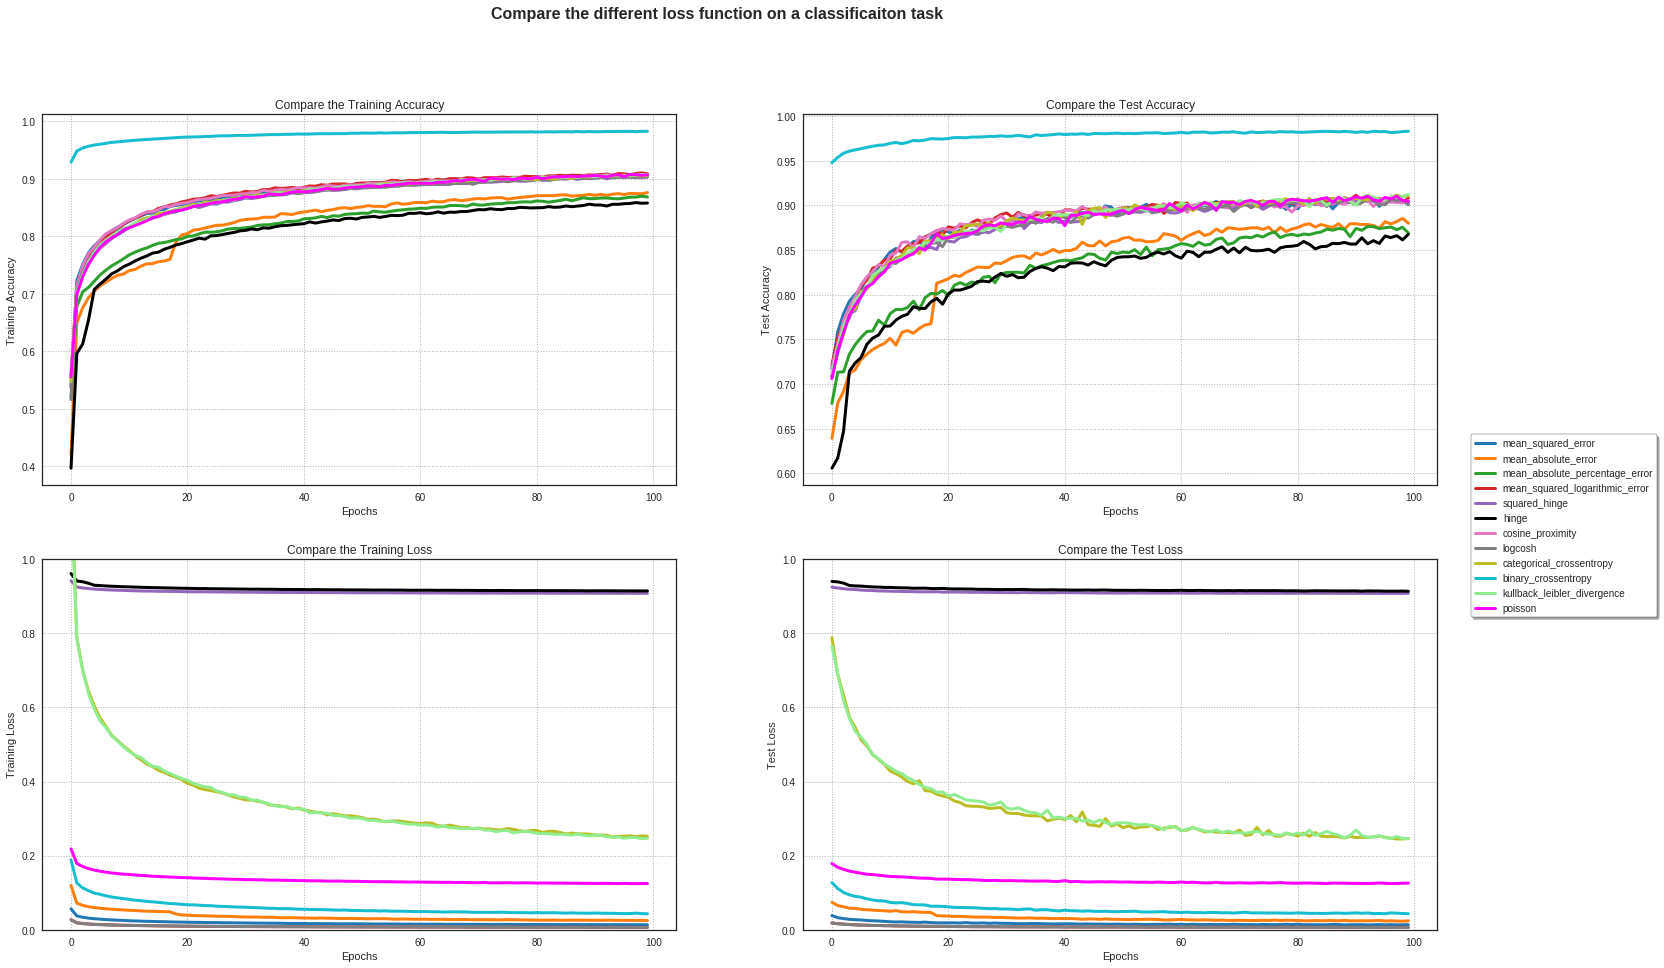

In [143]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(25,15))
ax1.plot(model_1_history.history['acc'],color=colors[0],label='mean_squared_error')
ax1.plot(model_2_history.history['acc'],color=colors[1],label='mean_absolute_error')
ax1.plot(model_3_history.history['acc'],color=colors[2],label='mean_absolute_percentage_error')
ax1.plot(model_4_history.history['acc'],color=colors[3],label='mean_squared_logarithmic_error')
ax1.plot(model_5_history.history['acc'],color=colors[4],label='squared_hinge')
ax1.plot(model_6_history.history['acc'],color='black',label='hinge')
ax1.plot(model_7_history.history['acc'],color=colors[6],label='cosine_proximity')
ax1.plot(model_8_history.history['acc'],color=colors[7],label='logcosh')
ax1.plot(model_9_history.history['acc'],color=colors[8],label='categorical_crossentropy')
ax1.plot(model_10_history.history['acc'],color=colors[9],label='binary_crossentropy')
ax1.plot(model_11_history.history['acc'],color='lightgreen',label='kullback_leibler_divergence')
ax1.plot(model_12_history.history['acc'],color='fuchsia',label='poisson')
#ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy')


ax2.plot(model_1_history.history['val_acc'],color=colors[0],label='mean_squared_error')
ax2.plot(model_2_history.history['val_acc'],color=colors[1],label='mean_absolute_error')
ax2.plot(model_3_history.history['val_acc'],color=colors[2],label='mean_absolute_percentage_error')
ax2.plot(model_4_history.history['val_acc'],color=colors[3],label='mean_squared_logarithmic_error')
ax2.plot(model_5_history.history['val_acc'],color=colors[4],label='squared_hinge')
ax2.plot(model_6_history.history['val_acc'],color='black',label='hinge')
ax2.plot(model_7_history.history['val_acc'],color=colors[6],label='cosine_proximity')
ax2.plot(model_8_history.history['val_acc'],color=colors[7],label='logcosh')
ax2.plot(model_9_history.history['val_acc'],color=colors[8],label='categorical_crossentropy')
ax2.plot(model_10_history.history['val_acc'],color=colors[9],label='binary_crossentropy')
ax2.plot(model_11_history.history['val_acc'],color='lightgreen',label='kullback_leibler_divergence')
ax2.plot(model_12_history.history['val_acc'],color='fuchsia',label='poisson')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy')


ax3.plot(model_1_history.history['loss'],color=colors[0],label='mean_squared_error')
ax3.plot(model_2_history.history['loss'],color=colors[1],label='mean_absolute_error')
ax3.plot(model_3_history.history['loss'],color=colors[2],label='mean_absolute_percentage_error')
ax3.plot(model_4_history.history['loss'],color=colors[3],label='mean_squared_logarithmic_error')
ax3.plot(model_5_history.history['loss'],color=colors[4],label='squared_hinge')
ax3.plot(model_6_history.history['loss'],color='black',label='hinge')
ax3.plot(model_7_history.history['loss'],color=colors[6],label='cosine_proximity')
ax3.plot(model_8_history.history['loss'],color=colors[7],label='logcosh')
ax3.plot(model_9_history.history['loss'],color=colors[8],label='categorical_crossentropy')
ax3.plot(model_10_history.history['loss'],color=colors[9],label='binary_crossentropy')
ax3.plot(model_11_history.history['loss'],color='lightgreen',label='kullback_leibler_divergence')
ax3.plot(model_12_history.history['loss'],color='fuchsia',label='poisson')
#ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.set_ylim(0,1)
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss')

ax4.plot(model_1_history.history['val_loss'],color=colors[0],label='mean_squared_error')
ax4.plot(model_2_history.history['val_loss'],color=colors[1],label='mean_absolute_error')
ax4.plot(model_3_history.history['val_loss'],color=colors[2],label='mean_absolute_percentage_error')
ax4.plot(model_4_history.history['val_loss'],color=colors[3],label='mean_squared_logarithmic_error')
ax4.plot(model_5_history.history['val_loss'],color=colors[4],label='squared_hinge')
ax4.plot(model_6_history.history['val_loss'],color='black',label='hinge')
ax4.plot(model_7_history.history['val_loss'],color=colors[6],label='cosine_proximity')
ax4.plot(model_8_history.history['val_loss'],color=colors[7],label='logcosh')
ax4.plot(model_9_history.history['val_loss'],color=colors[8],label='categorical_crossentropy')
ax4.plot(model_10_history.history['val_loss'],color=colors[9],label='binary_crossentropy')
ax4.plot(model_11_history.history['val_loss'],color='lightgreen',label='kullback_leibler_divergence')
ax4.plot(model_12_history.history['val_loss'],color='fuchsia',label='poisson')
#ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.set_ylim(0,1)
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss')

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.35),
          ncol=1, fancybox=True, shadow=True, frameon=True,edgecolor='black')


fig.suptitle('Compare the different loss function on a classificaiton task',fontsize=16, fontweight='bold')
plt.show()